<a href="https://colab.research.google.com/github/ANGELA-NYUTU/Regressions/blob/main/Moringa_Data_Science_Core_WEEK_6_Independent_Project_2021_10_Angela_Nyutu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS AND GAME OUTCOME PREDICTIONS FOR MCHEZOPESA LIMITED**

## **1. Defining the Question**

### **a) Specifying the Question**

Make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly and include rank in your training.

### **b) Defining the Metric for Success**

The model should at least have the ability to predict at least 85% correctly

### **c) Understanding the context**

The men's FIFA World Ranking is a ranking system for men's national teams in association football.The rankings are used by FIFA to rank the progression and current ability of the national football teams of its member nations.In this analysis, two datasets have been provide, one in country team ranking from 1993-2018and the other on game scores over a period of more than 30 years

### **d) Recording the Experimental Design**

The design is as follows:

1.Datasets loading and cleaning

2.Exploratory Data Analysis 

3. Modelling -polynominal regression 
             -logistical regression
4. Interpretation

## **2. Reading the Data**

**Importing Essential Libraries**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

**Loading and Previewing dataset**

**Ranking Dataset**

In [2]:
# Loading the Dataset
ranking=pd.read_csv('/content/fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
#checking the number of columns and rows
ranking.shape
#the ranking dataset has 57793 rows and 16 columns

(57793, 16)

In [5]:
#checking for column data types
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [6]:
ranking['rank_date'].unique()
#the time period of the ranking dataframe runs from 1993/08/08 to 2018-05-17

array(['1993-08-08', '1993-09-23', '1993-10-22', '1993-11-19',
       '1993-12-23', '1994-02-15', '1994-03-15', '1994-04-19',
       '1994-05-17', '1994-06-14', '1994-07-21', '1994-09-13',
       '1994-10-25', '1994-11-22', '1994-12-20', '1995-02-20',
       '1995-04-19', '1995-05-16', '1995-06-13', '1995-07-25',
       '1995-08-22', '1995-09-19', '1995-10-17', '1995-11-21',
       '1995-12-19', '1996-01-24', '1996-02-21', '1996-04-24',
       '1996-05-22', '1996-07-03', '1996-08-28', '1996-09-25',
       '1996-10-23', '1996-11-20', '1996-12-18', '1997-02-27',
       '1997-04-09', '1997-05-14', '1997-06-18', '1997-07-16',
       '1997-08-20', '1997-09-17', '1997-10-17', '1997-11-19',
       '1997-12-23', '1998-02-18', '1998-03-18', '1998-04-22',
       '1998-05-20', '1998-07-15', '1998-08-19', '1998-09-16',
       '1998-10-21', '1998-11-18', '1998-12-23', '1999-01-27',
       '1999-02-24', '1999-03-24', '1999-04-21', '1999-05-19',
       '1999-06-16', '1999-07-21', '1999-08-18', '1999-

**Results Dataset**

In [7]:
results=pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [9]:
#Checking the number of columns in the results dataset
results.shape
#the results dataset has 40839 row and 9 columns

(40839, 9)

In [10]:
#cheking column data types
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [11]:
results['date'].unique()
#the time period of the ranking dataframe runs from 11872-11-30 to 019-07-20

array(['1872-11-30', '1873-03-08', '1874-03-07', ..., '2019-07-18',
       '2019-07-19', '2019-07-20'], dtype=object)

### a.Validation

## **3. Tidying the Dataset**

**checking and correcting column names**

In [12]:
ranking.columns = ranking.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
results.columns = results.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [13]:
#Dropping Unnecesary Columns
rank=ranking[['rank','country_full','rank_date']]
rank.columns=['rank','country','rank_date']
rankdf=pd.DataFrame(rank)
rankdf.head(3)

,rank,country,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08


**Correcting Data Types**

In [14]:
#Changing rank_date column from object data type to datetime data type
rank_date=pd.to_datetime(ranking['rank_date'],errors='coerce')
rankdf['rank_date']=rank_date
rankdf['rank_date'].dtypes

dtype('<M8[ns]')

In [15]:
#Changing date column from object data type to datetime data type
results_date=results['date'].astype('datetime64[ns]')
results['date']=results_date
results['date'].dtype


dtype('<M8[ns]')

**Checking for outliers**

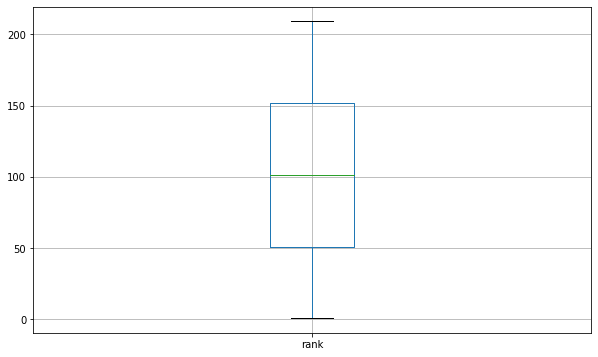

In [16]:
rankdf.boxplot(figsize=(10,6))
#there are no outlier in the rankdf dataframe

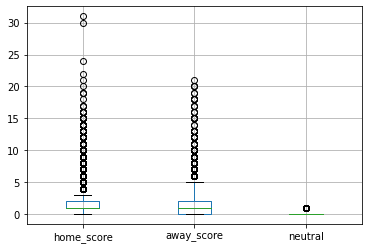

In [17]:
results.boxplot()
#these ouliers in the results dataframe will not be dropped because it is possible to have scored those many goals

**Checking for missing values**

In [18]:
# Identifying the Missing Data
print(results.isnull().sum())
print(rankdf.isnull().sum())
#There are no missing values in our dataframes

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
rank         0
country      0
rank_date    0
dtype: int64


**Checking for Duplicated Records**

In [19]:
# Identifying duplicated data
def duplicated(df):
  duplicates=df.duplicated().sum()
  return duplicates


In [20]:
duplicated(results)
#There are no duplicaed values in the results df

0

In [21]:
#Checking duplicated records in the rank df
duplicated(rankdf)
#there are 38 duplicated records

38

In [22]:
#Dropping duplicates
rankdf.drop_duplicates(inplace=True)
rank.shape

(57793, 3)

**Unifying data date periods**

In [23]:
#the data will run from same time periods i.e. 1993-2018
rankdf = rankdf[rankdf.rank_date.dt.year > 1993]
rankdf =rankdf[rankdf.rank_date.dt.year < 2018]
results = results[results.date.dt.year > 1993]
results = results[results.date.dt.year < 2018]
print(rankdf.shape)
print(results.shape)

(55652, 3)
(21402, 9)


## **4. Merging the Dataframes**

The merging will allow the visibility of the specific country ranks 

In [24]:
gamedf=pd.merge(rankdf,results,how='inner',on='country' )
gamedf.head()

,rank,country,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,1994-02-15,1994-03-23,Germany,Italy,2,1,Friendly,Stuttgart,False
1,1,Germany,1994-02-15,1994-05-29,Germany,Republic of Ireland,0,2,Friendly,Hanover,False
2,1,Germany,1994-02-15,1994-12-18,Germany,Albania,2,1,UEFA Euro qualification,Kaiserslautern,False
3,1,Germany,1994-02-15,1995-04-26,Germany,Wales,1,1,UEFA Euro qualification,Düsseldorf,False
4,1,Germany,1994-02-15,1995-09-06,Germany,Georgia,4,1,UEFA Euro qualification,Nuremberg,False


In [25]:
gamedf.tail()

,rank,country,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
5183855,206,Gibraltar,2017-12-21,2011-03-11,Gibraltar,Faroe Islands,3,0,Friendly,Gibraltar,False
5183856,206,Gibraltar,2017-12-21,2014-03-01,Gibraltar,Faroe Islands,1,4,Friendly,Gibraltar,False
5183857,206,Gibraltar,2017-12-21,2014-03-05,Gibraltar,Estonia,0,2,Friendly,Gibraltar,False
5183858,206,Gibraltar,2017-12-21,2016-03-23,Gibraltar,Liechtenstein,0,0,Friendly,Gibraltar,False
5183859,206,Gibraltar,2017-12-21,2016-03-29,Gibraltar,Latvia,0,5,Friendly,Gibraltar,False


In [26]:
#dropping unnecessary columns
gamedf.drop(['rank_date',	'date'],axis=1,inplace=True)

In [27]:
gamedf.isnull().any()

rank          False
country       False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
neutral       False
dtype: bool

## **5. Feature engineering**

In [28]:
#calculating the wins,losses and draw games to determine which outcomethe home team had in a specific game
gamedf['outcome'] = gamedf['home_score'] - gamedf['away_score']
def outcome(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

gamedf['outcome']=gamedf.outcome.apply(lambda x: outcome(x))


In [29]:
#gamedf.columns=[['home_team_rank','country','home_team',	'away_team',	'home_score',	'away_score',	'tournament',	'city',	'neutral',	'outcome']]

gamedf.head()


,rank,country,home_team,away_team,home_score,away_score,tournament,city,neutral,outcome
0,1,Germany,Germany,Italy,2,1,Friendly,Stuttgart,False,win
1,1,Germany,Germany,Republic of Ireland,0,2,Friendly,Hanover,False,loss
2,1,Germany,Germany,Albania,2,1,UEFA Euro qualification,Kaiserslautern,False,win
3,1,Germany,Germany,Wales,1,1,UEFA Euro qualification,Düsseldorf,False,draw
4,1,Germany,Germany,Georgia,4,1,UEFA Euro qualification,Nuremberg,False,win


## **6. Exploratory Data Analysis**

**Univariate Analysis**

In [30]:
#Describing the numerical data
gamedf.describe()

,rank,home_score,away_score
count,5.183860e+06,5.183860e+06,5.183860e+06
mean,7.594264e+01,1.648417e+00,1.088505e+00
std,5.123562e+01,1.692600e+00,1.324070e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.200000e+01,0.000000e+00,0.000000e+00
50%,7.000000e+01,1.000000e+00,1.000000e+00
75%,1.130000e+02,2.000000e+00,2.000000e+00
max,2.090000e+02,3.100000e+01,2.100000e+01


In [31]:
def pie(column):
  data=gamedf[column].value_counts()
  plot=plt.pie(data ,labels=['True','False'], autopct = '%1.1f%%', shadow = True, startangle = 140)
  plt.axis('equal')
  plt.title(f'{column}')
  plt.show()
  return plot
#The dataset features more games on neutral games

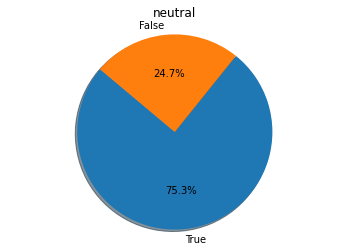

([<matplotlib.patches.Wedge at 0x7f1f698ddc50>,
 [Text(0.10749615455899739, -1.0947349344727373, 'True'),
  Text(-0.10749620580723848, 1.0947349294404778, 'False')],
 [Text(0.058634266123089473, -0.5971281460760384, '75.3%'),
  Text(-0.05863429407667553, 0.5971281433311697, '24.7%')])

In [32]:
pie('neutral')

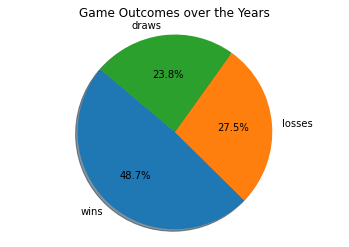

In [34]:
outcomepie=gamedf['outcome'].value_counts()
plt.pie(outcomepie ,labels=['wins','losses','draws'], autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Game Outcomes over the Years')
plt.show()

In [35]:
#The number outcomes of home_teamsplayed between 1993 and 2018
gamedf['outcome'].value_counts()

win     2524940
loss    1425900
draw    1233020
Name: outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


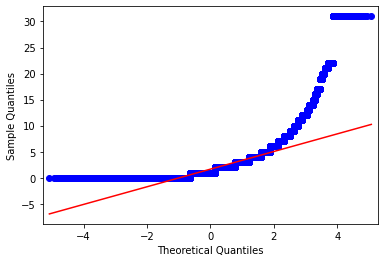

In [36]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(gamedf['home_score'], line='s')
plt.show()
#This shows that this data is normaly distributed as discreet data and is also good for polynominal regression

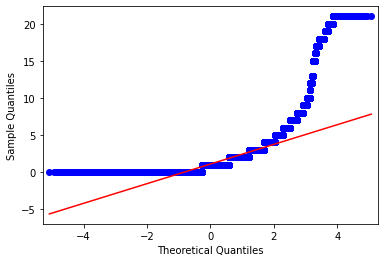

In [37]:
qqplot(gamedf['away_score'],line='s')
plt.show()
#This shows that this data is normaly distributed as discreet data and is also good for polynominal regression

<function matplotlib.pyplot.show>

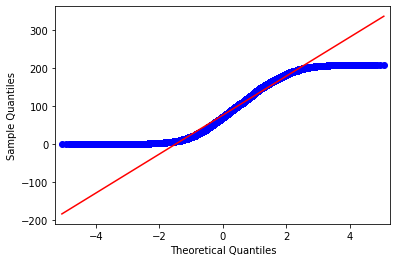

In [38]:
qqplot(gamedf['rank'],line='s')
plt.show

**Bivariate Analysis**

In [39]:
def visual(df,var1,var2):
  viz=df.groupby([var1,var2])[var2].count().unstack().plot(figsize=(10,7),color=['green','blue','orange'],kind= 'bar')
  return viz

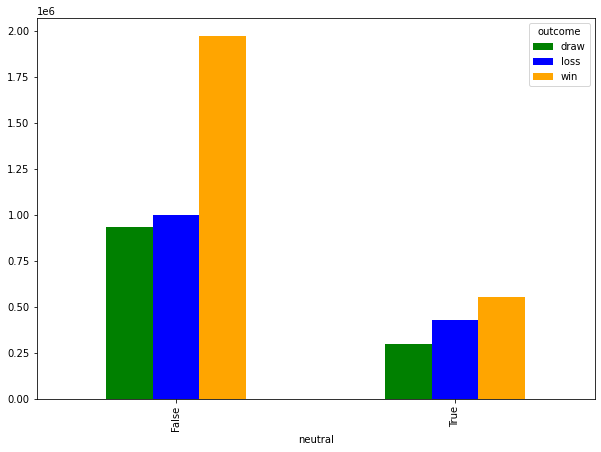

In [40]:
visual(gamedf, 'neutral','outcome')

**Multivariate analysis**

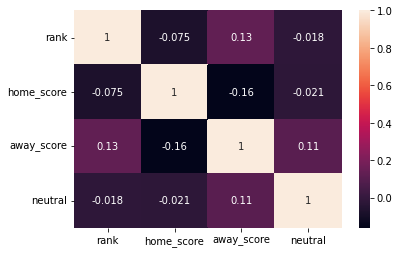

In [41]:
sns.heatmap(gamedf.corr(),annot=True)
plt.show()

In [42]:
#encoding outcomes(win, loss and draw)as ordinal numerical data
gamedf['outcome']=gamedf['outcome'].astype('category')
gamedf['outcomes'] = gamedf['outcome'].cat.codes
gamedf.head()

,rank,country,home_team,away_team,home_score,away_score,tournament,city,neutral,outcome,outcomes
0,1,Germany,Germany,Italy,2,1,Friendly,Stuttgart,False,win,2
1,1,Germany,Germany,Republic of Ireland,0,2,Friendly,Hanover,False,loss,1
2,1,Germany,Germany,Albania,2,1,UEFA Euro qualification,Kaiserslautern,False,win,2
3,1,Germany,Germany,Wales,1,1,UEFA Euro qualification,Düsseldorf,False,draw,0
4,1,Germany,Germany,Georgia,4,1,UEFA Euro qualification,Nuremberg,False,win,2


In [43]:
#transforming objects to numerical dtypes
gamedf['tournament'] =le.fit_transform(gamedf['tournament'])
gamedf['home_team'] =le.fit_transform(gamedf['home_team'])
gamedf['away_team'] =le.fit_transform(gamedf['away_team'])

In [44]:
gamedf.dtypes

rank             int64
country         object
home_team        int64
away_team        int64
home_score       int64
away_score       int64
tournament       int64
city            object
neutral           bool
outcome       category
outcomes          int8
dtype: object

In [45]:
gamedf.head(700)

,rank,country,home_team,away_team,home_score,away_score,tournament,city,neutral,outcome,outcomes
0,1,Germany,97,122,2,1,30,Stuttgart,False,win,2
1,1,Germany,97,196,0,2,30,Hanover,False,loss,1
2,1,Germany,97,2,2,1,58,Kaiserslautern,False,win,2
3,1,Germany,97,265,1,1,58,Düsseldorf,False,draw,0
4,1,Germany,97,92,4,1,58,Nuremberg,False,win,2
...,...,...,...,...,...,...,...,...,...,...,...
695,2,Germany,196,87,0,1,27,Munich,True,loss,1
696,2,Germany,97,191,3,1,27,Stuttgart,False,win,2
697,2,Germany,126,87,1,1,27,Berlin,True,draw,0
698,2,Germany,97,233,3,0,30,Gelsenkirchen,False,win,2


## **Regressions**

### **Polynominal Regression Analysis**

**Defining the idependent and dependent variables**

In [46]:
gamedf.columns

Index(['rank', 'country', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'outcome', 'outcomes'],
      dtype='object')

**Checking for multicollinearity**

In [47]:
#checking the corriration among the independent variables
corr_gamedf=gamedf[['country', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'outcome', 'outcomes']].corr()
corr_gamedf

,home_team,away_team,home_score,away_score,tournament,neutral,outcomes
home_team,1.000000,0.000651,0.008782,-0.027208,-0.041773,-0.018269,0.000033
away_team,0.000651,1.000000,-0.041894,0.023427,-0.014782,0.056762,-0.021861
home_score,0.008782,-0.041894,1.000000,-0.160979,-0.015206,-0.020634,0.513624
away_score,-0.027208,0.023427,-0.160979,1.000000,0.020371,0.110906,-0.231081
tournament,-0.041773,-0.014782,-0.015206,0.020371,1.000000,-0.110295,-0.006441
neutral,-0.018269,0.056762,-0.020634,0.110906,-0.110295,1.000000,-0.036060
outcomes,0.000033,-0.021861,0.513624,-0.231081,-0.006441,-0.036060,1.000000


In [48]:
#checking for variance inflation factor in the independent variables. a variable with a VIF > 5 will be dropped
pd.DataFrame(np.linalg.inv(corr_gamedf.values), index = corr_gamedf.index, columns=corr_gamedf.columns)
#None of the independent variables has a VIF > 5

,home_team,away_team,home_score,away_score,tournament,neutral,outcomes
home_team,1.002973,-0.001926,-0.009804,0.025313,0.043558,0.020654,0.011835
away_team,-0.001926,1.005132,0.041199,-0.012071,0.009672,-0.053973,-0.003861
home_score,-0.009804,0.041199,1.363852,0.060000,0.014844,-0.004123,-0.685794
away_score,0.025313,-0.012071,0.060000,1.072849,-0.031088,-0.112363,0.212581
tournament,0.043558,0.009672,0.014844,-0.031088,1.015577,0.115874,-0.003879
neutral,0.020654,-0.053973,-0.004123,-0.112363,0.115874,1.029060,0.012826
outcomes,0.011835,-0.003861,-0.685794,0.212581,-0.003879,0.012826,1.401717


**Train and Test data splitting**

In [ ]:
x1=gamedf[['rank','tournament','home_score','away_score']].values
y1=gamedf['outcomes'].values
print(x1)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=25)
r = LinearRegression()
r.fit(x_train,y_train)
y_p=r.predict(x_test)
predicted=pd.DataFrame({'Actual':y_test, 'Predicted Scores':y_p})
predicted

,Actual,Predicted Scores
0,0,1.121521
1,0,0.937471
2,0,0.944380
3,0,1.100561
4,0,1.115100
...,...,...
1036767,1,0.917477
1036768,2,2.023405
1036769,2,1.450098
1036770,2,2.385159


In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_p))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_p))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))

Mean Absolute Error: 0.5679267713116667
Mean Squared Error: 0.47272465919828255
Root Mean Squared Error: 0.6875497503441351


In [52]:
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(x1)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

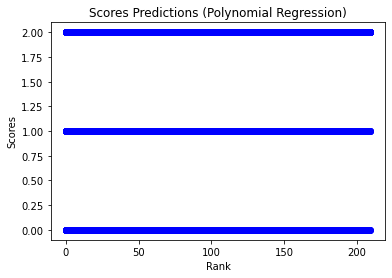

In [54]:
plt.scatter(x_test, y_train, color='blue') 
#plt.plot(x1, pol_reg.predict(X_poly), color='red')
plt.title('Scores Predictions (Polynomial Regression)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.show()

### **Logistic Regressions**

In [75]:
#the VIF of the independent variables(x) have already been determine and is <5
x=gamedf[['home_team','home_score']].values
y=gamedf['outcomes'].values

In [76]:
#splitting to training and test sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
#fitting the training sets to the regressor
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_predicted=lr.predict(xtest)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_predicted)
print(cm)
df2=pd.DataFrame({'Actual':ytest,'Predicted':y_predicted})
df2

[[160613 140922  68581]
 [134960 258590  34695]
 [172941      0 583856]]


,Actual,Predicted
0,2,0
1,2,2
2,2,2
3,1,1
4,0,0
...,...,...
1555153,1,1
1555154,2,2
1555155,0,0
1555156,2,2


In [78]:
from sklearn.metrics import log_loss
log_loss([0, 1,2],[[160613, 140922 , 68581],
 [134960, 258590,  34695],
 [172941,      0, 583856]])

0.963457252632055

In [ ]:
#Precision, f1 and recall are used in logistic regression.
#From a confusion matrix,
#Accuracy = tp+tn/ tp+tn+fp+fn
print('accuracy =1')
#Precision is p
#P= tp/tp+fp=tp/sum of predicted positive
print('precision=1')
#Recall is r
#R= tp/tp+fn=tp/sum of actual positive
print('recall=1' )



## 8. Conclusion

With an RMSE: 0.6, polynominal regression is not the best in modeling data for this type of research since data is discreet as oppesed to continuous data. However the logistic model with a log loss of 0.9 shows that we may not have adequate data